Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2022/2023  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2022 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **23. listopada 2022. u 23:59h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0], [1], [2], [4]])
y = np.array([4, 1, 2, 5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [3]:
from sklearn.preprocessing import PolynomialFeatures

polynom = PolynomialFeatures(degree=1, interaction_only=False, include_bias=True, order='C')
phi = polynom.fit_transform(X, y=None)

print(phi)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [4]:
from numpy import linalg

gramMatrix_phi = np.dot(phi.T, phi)
pseudoInverse_1 = np.dot(linalg.inv(gramMatrix_phi), phi.T)
w_1 = np.dot(pseudoInverse_1, y)

pseudoInverse_2 = linalg.pinv(phi)
w_2 = np.dot(pseudoInverse_2, y)

print("w_1 = ", w_1)
print("w_2 = ", w_2)

w_1 =  [2.2        0.45714286]
w_2 =  [2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

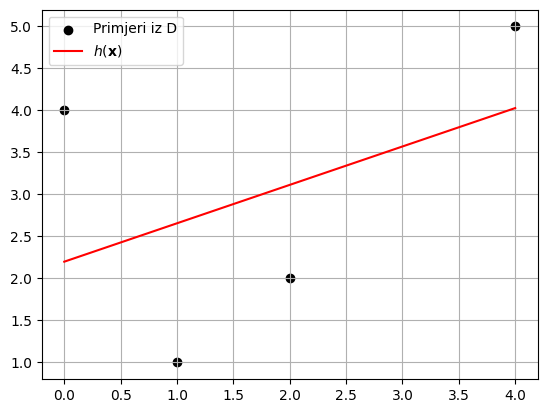

E(h|D) =  4.085714285714285
MSE =  2.0428571428571427


In [5]:
from cProfile import label
from sklearn.metrics import mean_squared_error

h = np.dot(phi, w_1)
plt.scatter(X, y, c='black', label='Primjeri iz D')
plt.plot(X, h, c='red', label='$h({\mathbf{x}})$')
plt.legend()
plt.grid()
plt.show()

learningError = 0.5 * sum(np.power(y - h, 2))
print("E(h|D) = ", learningError)

mse = mean_squared_error(y, h)
print("MSE = ", mse)

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [6]:
try:
    np.dot(linalg.inv(phi), y)
except Exception as err:
    print("Došlo je do pogreške: ", err)

Došlo je do pogreške:  Last 2 dimensions of the array must be square


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [7]:
from sklearn.linear_model import LinearRegression

polynom_r = PolynomialFeatures(degree=1, interaction_only=False, include_bias=False, order='C')
phi_r = polynom_r.fit_transform(X)
regression = LinearRegression().fit(phi_r, y)

w_r = np.concatenate(([regression.intercept_], regression.coef_))
print("w_r = ", w_r)

h_r = regression.predict(phi_r)
mse_r = mean_squared_error(y, h_r)

print("MSE_r = ", mse_r)

w_r =  [2.2        0.45714286]
MSE_r =  2.042857142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [8]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    return f(X) + normal(loc=0, scale=noise, size=X.shape)

In [9]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [10]:
def f(x):
    return 5 + x - 2 * (x ** 2) - 5 * (x ** 3)
X_N = make_instances(-5, 5, 50)
Y_N = make_labels(X_N, f, 200)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

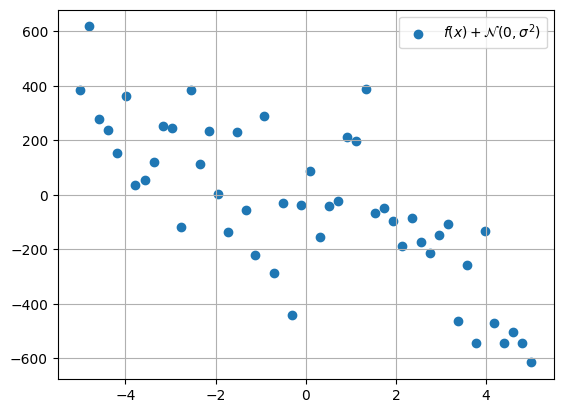

In [11]:
plt.scatter(X_N, Y_N, label='$f(x)+\mathcal{N}(0,\sigma^2)$')
plt.legend()
plt.grid()
plt.show()

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

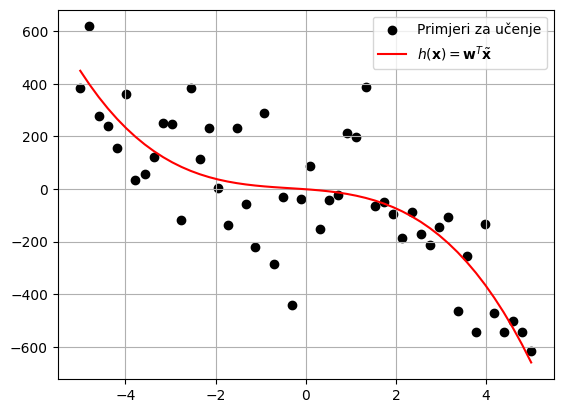

In [12]:
polynom_r = PolynomialFeatures(degree=3, interaction_only=False, include_bias=True, order='C')
phi_r = polynom_r.fit_transform(X_N)
regression_R = LinearRegression().fit(phi_r, Y_N)
h_R = regression_R.predict(phi_r)

plt.scatter(X_N, Y_N, c='black', label='Primjeri za učenje')
plt.plot(X_N, h_R, c='red', label='$h(\mathbf{x})=\mathbf{w}^T\~{\mathbf{x}}$')

plt.legend()
plt.grid()
plt.show()

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

E(h|D) = 34371.05 za d = 1
E(h|D) = 27093.98 za d = 3
E(h|D) = 26689.68 za d = 5
E(h|D) = 21728.16 za d = 10
E(h|D) = 17953.22 za d = 20


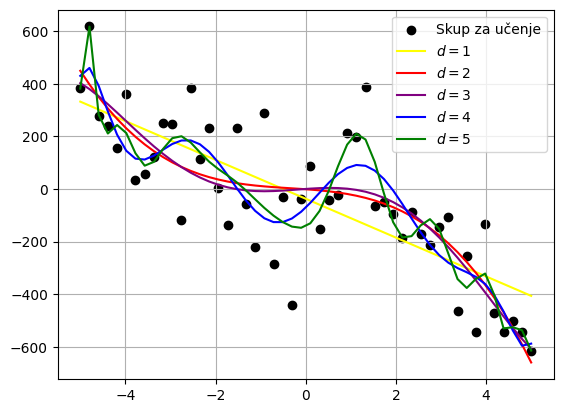

In [13]:
polynomDegrees = [1, 3, 5, 10, 20]
graphColors = ["yellow", "red", "purple", "blue", "green"]
i = 0

plt.scatter(X_N, Y_N, color="black", label="Skup za učenje")

for d in polynomDegrees:
    polynom_r.set_params(degree=d)
    phi_r = polynom_r.fit_transform(X_N)
    regression_R.fit(phi_r, Y_N)
    h_R = regression_R.predict(phi_r)
    plt.plot(X_N, h_R, color=graphColors[i], label="$d={}$".format(i + 1))
    i += 1
    err_d = mean_squared_error(Y_N, h_R)
    print("E(h|D) = {0:.2f} za d = {1:d}".format(err_d, d))

plt.grid()
plt.legend()
plt.show()



### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

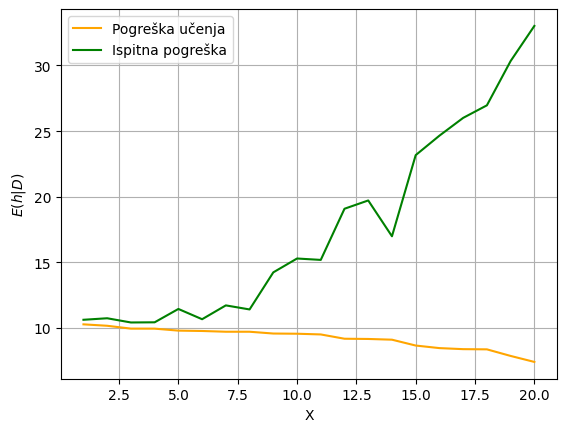

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_N, Y_N, test_size=0.5, train_size=0.5)
err_train = []
err_test = []

for d in range (1, 21):
    polynom_d = PolynomialFeatures(degree=d, interaction_only=False, include_bias=True, order='C')
    phi_train = polynom_d.fit_transform(X_train)
    phi_test = polynom_d.fit_transform(X_test)

    regression_d = LinearRegression().fit(phi_train, y_train)
    h_train = regression_d.predict(phi_train)
    h_test = regression_d.predict(phi_test)

    trainError = mean_squared_error(h_train, y_train)
    testError = mean_squared_error(h_test, y_test)

    err_train.append(np.log(trainError))
    err_test.append(np.log(testError))

plt.plot(range(1,21), err_train, color="orange", label="Pogreška učenja")
plt.plot(range(1, 21), err_test, color="green", label="Ispitna pogreška")
plt.xlabel("X")
plt.ylabel("$E(h|D)$")
plt.legend()
plt.grid()
plt.show()

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

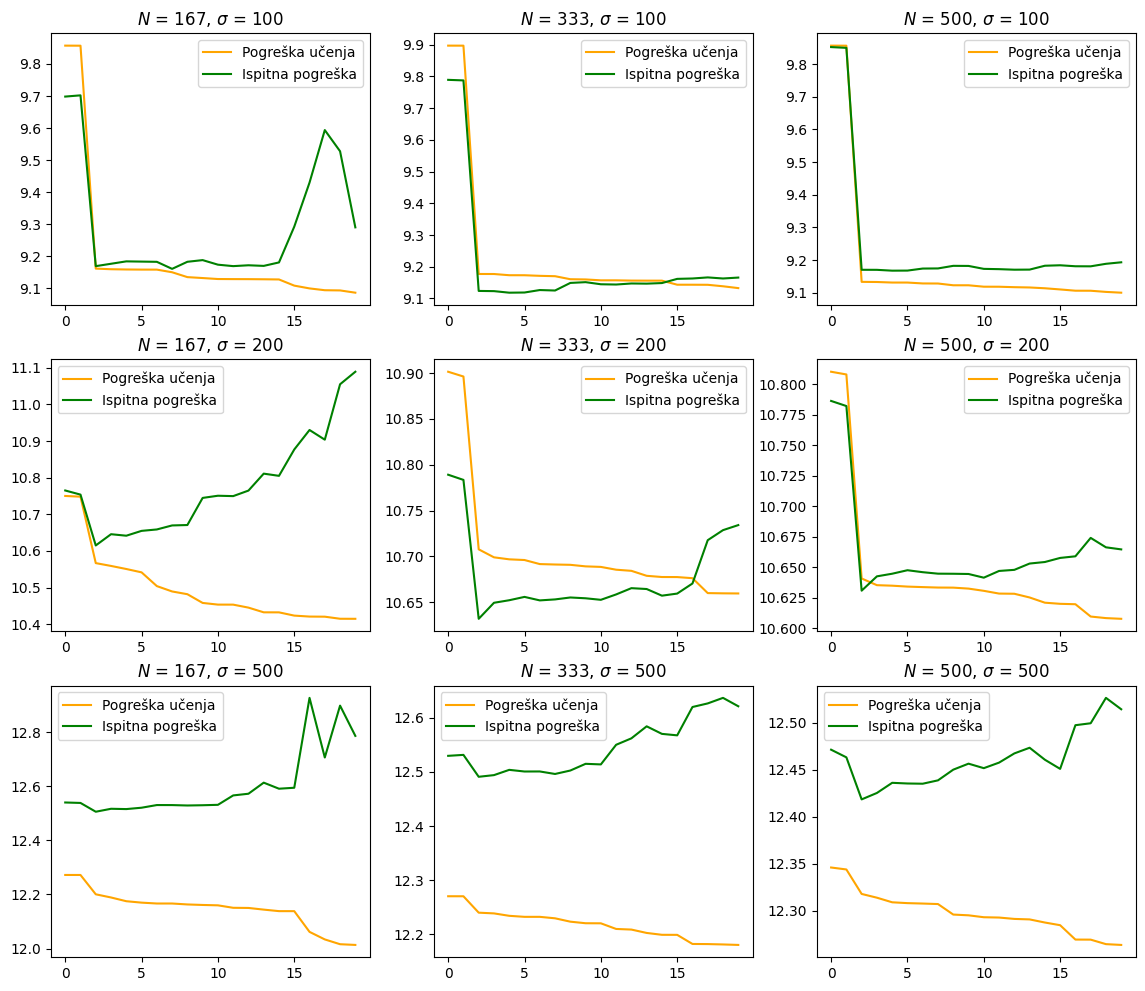

In [15]:
degrees = range(1, 21)
N = [167, 333, 500]
sigmas = [100, 200, 500]


fig, ax = plt.subplots(3, 3, figsize=(14, 12))

X_examples = make_instances(-5, 5, 1000)
X_train, X_test = train_test_split(X_examples, test_size=0.5, train_size=0.5)

for sigma in sigmas:
    y_train_2 = make_labels(X_train, f, sigma)
    y_test_2 = make_labels(X_test, f, sigma)

    for n in N:
        X_train_split = X_train[0:n]
        X_test_split = X_test[:n]

        y_train_3 = y_train_2[:n]
        y_test_3 = y_test_2[:n]
        trainErrors = []
        testErrors = []

        for d in degrees:
            polynom_p = PolynomialFeatures(degree=d, interaction_only=False, include_bias=False, order='C')
            phi_train_2 = polynom_p.fit_transform(X_train_split)
            phi_test_2 = polynom_p.fit_transform(X_test_split)

            regression_p = LinearRegression().fit(phi_train_2, y_train_3)
            trainErrors.append(np.log(mean_squared_error(y_train_3, regression_p.predict(phi_train_2))))
            testErrors.append(np.log(mean_squared_error(y_test_3, regression_p.predict(phi_test_2))))

        ax[sigmas.index(sigma), N.index(n)].plot(range(0, 20), trainErrors, color="orange", label="Pogreška učenja")
        ax[sigmas.index(sigma), N.index(n)].plot(range(0, 20), testErrors, color="green", label="Ispitna pogreška")
        ax[sigmas.index(sigma), N.index(n)].set_title("$N$ = {}, $\sigma$ = {}".format(n, sigma))
        ax[sigmas.index(sigma), N.index(n)].legend()

plt.show()

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [16]:
X_ridge = np.array([[0], [1], [2], [4]])
y_ridge = np.array([4, 1, 2, 5])
polynom_ridge = PolynomialFeatures(degree=3, interaction_only=False, include_bias=True, order='C')
lambdas = [0, 1, 10]

phi_ridge = polynom_ridge.fit_transform(X_ridge)

identity = np.identity(4)
identity[0][0] = 0

for l in lambdas:
    w = np.dot(np.dot(linalg.inv(np.dot(phi_ridge.T, phi_ridge) + l * identity), phi_ridge.T), y_ridge)

    print("Težine za \u03BB = {}: {}".format(l, w))

Težine za λ = 0: [ 4.         -5.91666667  3.375      -0.45833333]
Težine za λ = 1: [ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
Težine za λ = 10: [ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [17]:
from sklearn.linear_model import Ridge

alphas = [0, 1, 10]

for a in alphas:
    model_ridge = Ridge(a).fit(phi_ridge, y_ridge)

    w = model_ridge.coef_
    w[0] = model_ridge.intercept_

    print("Težine za \u03B1 = {}: {}".format(a, w))

Težine za α = 0: [ 4.         -5.91666667  3.375      -0.45833333]
Težine za α = 1: [ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
Težine za α = 10: [ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

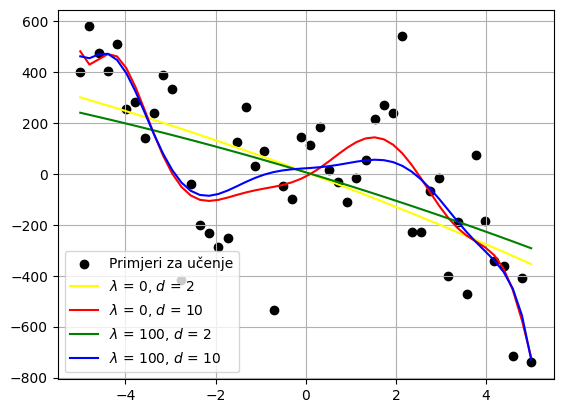

In [18]:
X_ridge = make_instances(-5, 5, 50)
y_ridge = make_labels(X_ridge, f, 200)

graphColors = ["yellow", "red", "green", "blue"]
i = 0

plt.scatter(X_ridge, y_ridge, color="black", label="Primjeri za učenje")

lambdas = [0, 100]
dimensions = [2, 10]

for l in lambdas:
    for d in dimensions:
        polynom_ridge.set_params(degree=d)
        phi_ridge = polynom_ridge.fit_transform(X_ridge)

        model_ridge = Ridge(l).fit(phi_ridge, y_ridge)
        h_ridge = model_ridge.predict(phi_ridge)

        plt.plot(X_ridge, h_ridge, color=graphColors[i], label="$\u03BB$ = {}, $d$ = {}".format(l, d))
        i += 1

plt.legend()
plt.grid()
plt.show()


### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


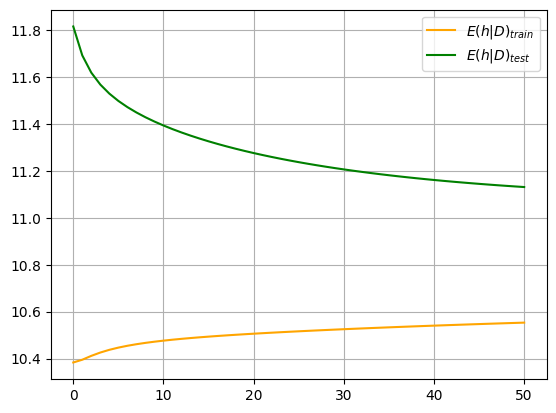

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_ridge, y_ridge, test_size=0.5, train_size=0.5)
error_train = []
error_test = []

polynom_ridge.set_params(degree=10)
phi_ridge_train = polynom_ridge.fit_transform(X_train)
phi_ridge_test = polynom_ridge.fit_transform(X_test)

lambdas = range(0, 51)

for l in lambdas:
    model_ridge = Ridge(l).fit(phi_ridge_train, y_train)

    error_train.append(np.log(mean_squared_error(y_train, model_ridge.predict(phi_ridge_train))))
    error_test.append(np.log(mean_squared_error(y_test, model_ridge.predict(phi_ridge_test))))

plt.plot(range(0, 51), error_train, color="orange", label="$E(h|D)_{train}$")
plt.plot(range(0, 51), error_test, color="green", label="$E(h|D)_{test}$")

plt.legend()
plt.grid()
plt.show()

### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [20]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

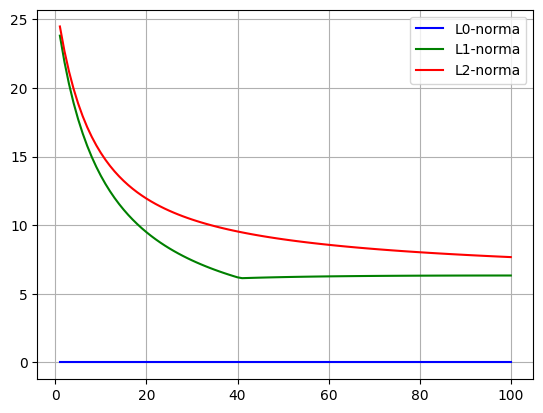

In [21]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X_N, Y_N, test_size=0.5, train_size=0.5)
polynom_reg = PolynomialFeatures(degree=5)
phi_reg_train = polynom_reg.fit_transform(X_train)
lambdas = range(1, 101)

l_0 = []
l_1 = []
l_2 = []

for l in lambdas:
    model_reg = Ridge(l).fit(phi_reg_train, y_train)

    w_reg = model_reg.coef_

    l_0.append(nonzeroes(w_reg))
    l_1.append(linalg.norm(w_reg, 1))
    l_2.append(linalg.norm(w_reg, 2))

plt.plot(lambdas, l_0, color="blue", label="L0-norma")
plt.plot(lambdas, l_1, color="green", label="L1-norma")
plt.plot(lambdas, l_2, color="red", label="L2-norma")

plt.legend()
plt.grid()
plt.show()

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

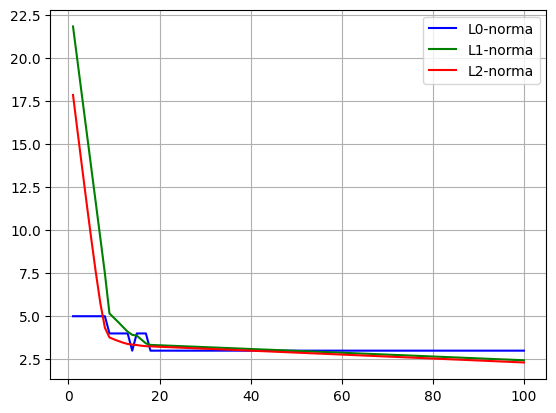

In [22]:
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X_N, Y_N, test_size=0.5, train_size=0.5)
polynom_lasso = PolynomialFeatures(degree=5)
phi_lasso_train = polynom_lasso.fit_transform(X_train)
lambdas = range(1, 101)

l_0 = []
l_1 = []
l_2 = []

for l in lambdas:
    model_lasso = Lasso(l).fit(phi_lasso_train, y_train)

    w_lasso = model_lasso.coef_

    l_0.append(nonzeroes(w_lasso))
    l_1.append(linalg.norm(w_lasso, 1))
    l_2.append(linalg.norm(w_lasso, 2))

plt.plot(lambdas, l_0, color="blue", label="L0-norma")
plt.plot(lambdas, l_1, color="green", label="L1-norma")
plt.plot(lambdas, l_2, color="red", label="L2-norma")

plt.legend()
plt.grid()
plt.show()

### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [23]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

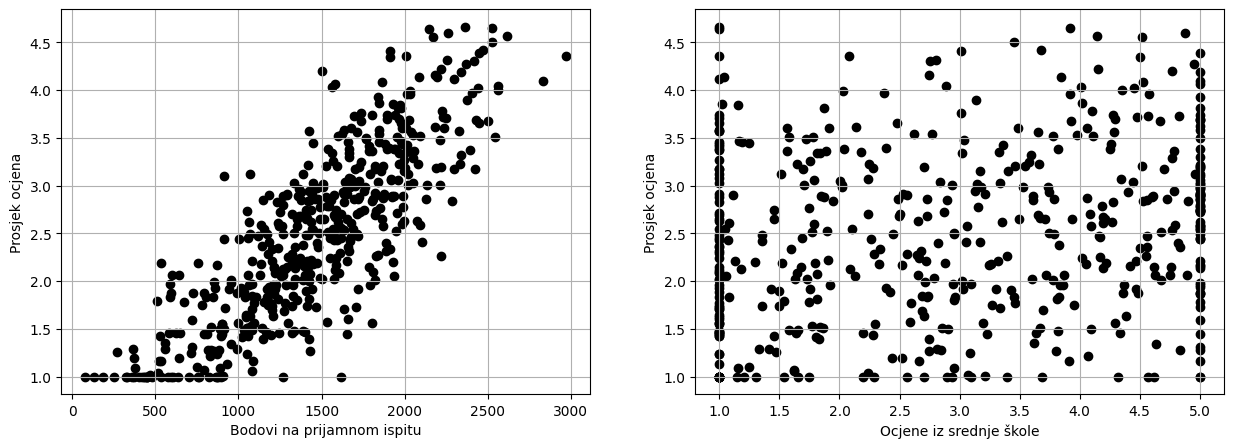

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].scatter(exam_score, grades_y, color="black")
ax[0].set_xlabel("Bodovi na prijamnom ispitu")
ax[0].set_ylabel("Prosjek ocjena")
ax[0].grid()

ax[1].scatter(grade_in_highschool, grades_y, color="black")
ax[1].set_xlabel("Ocjene iz srednje škole")
ax[1].set_ylabel("Prosjek ocjena")
ax[1].grid()

plt.show()

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [25]:
model_l2reg = Ridge(0.01).fit(grades_X, grades_y)

print(model_l2reg.intercept_, model_l2reg.coef_)

0.15061179575776018 [0.00141497 0.09477276]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

grades_X_fixed = scaler.fit_transform(grades_X)
grades_y_fixed = scaler.fit_transform(grades_y.reshape(-1, 1))

model_l2reg = Ridge(0.01).fit(grades_X_fixed, grades_y_fixed)

print(model_l2reg.coef_)

[[0.81630375 0.15167761]]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [27]:
grades_X_fixed_colinear = np.column_stack((grades_X_fixed[:, 0], grades_X_fixed[:, 1], grades_X_fixed[:, 1]))
print(grades_X_fixed_colinear)

[[ 0.95063817 -0.78607869 -0.78607869]
 [-0.50343434 -0.50193004 -0.50193004]
 [ 1.18596832 -0.52213172 -0.52213172]
 ...
 [-0.31593552  0.80074234  0.80074234]
 [ 0.81288393  1.24783236  1.24783236]
 [-0.01938126  1.21729714  1.21729714]]


Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [28]:
model_l2reg = Ridge(0.01).fit(grades_X_fixed_colinear, grades_y_fixed)
print(model_l2reg.coef_)

[[0.81630364 0.07583957 0.07583957]]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [29]:
ridge_001 = Ridge(0.01)
ridge_1000 = Ridge(1000)

std_001 = []
std_1000 = []

for i in range(10):
    grades_X_train, grades_X_test, grades_y_train, grades_y_test = train_test_split(grades_X_fixed_colinear, grades_y_fixed, test_size=0.5, train_size=0.5)
    
    model_001 = ridge_001.fit(grades_X_train, grades_y_train)
    model_1000 = ridge_1000.fit(grades_X_train, grades_y_train)

    w_001 = model_001.coef_[0]
    w_1000 = model_1000.coef_[0]

    std_001.append(model_001.coef_)
    std_1000.append(model_1000.coef_)   

    print("Iteracija {}:".format(i + 1))
    print("\u03BB = 0.01, w = {}".format(w_001))
    print("\u03BB = 1000, w = {}".format(w_1000))
    print()

print("Standardne devijacije težina za \u03BB = 0.01: {}".format(np.std(std_001, axis=0)))
print("Standardne devijacije težina za \u03BB = 1000: {}".format(np.std(std_1000, axis=0)))

Iteracija 1:
λ = 0.01, w = [0.79385128 0.06504303 0.06504303]
λ = 1000, w = [0.16436364 0.03812874 0.03812874]

Iteracija 2:
λ = 0.01, w = [0.80739011 0.0761075  0.0761075 ]
λ = 1000, w = [0.15992321 0.02415424 0.02415424]

Iteracija 3:
λ = 0.01, w = [0.814158   0.07673386 0.07673386]
λ = 1000, w = [0.16128257 0.02717137 0.02717137]

Iteracija 4:
λ = 0.01, w = [0.83265053 0.07483515 0.07483515]
λ = 1000, w = [0.16579999 0.03405283 0.03405283]

Iteracija 5:
λ = 0.01, w = [0.79735626 0.08013669 0.08013669]
λ = 1000, w = [0.15703356 0.02664742 0.02664742]

Iteracija 6:
λ = 0.01, w = [0.81845427 0.04525193 0.04525193]
λ = 1000, w = [0.17833349 0.03188297 0.03188297]

Iteracija 7:
λ = 0.01, w = [0.80086373 0.0614553  0.0614553 ]
λ = 1000, w = [0.15563723 0.022474   0.022474  ]

Iteracija 8:
λ = 0.01, w = [0.81216485 0.06648337 0.06648337]
λ = 1000, w = [0.16174675 0.03077003 0.03077003]

Iteracija 9:
λ = 0.01, w = [0.81501911 0.04444567 0.04444567]
λ = 1000, w = [0.16591703 0.01772788 0.017

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.